# Plotting unstructured data

In many cases the data being used is not structured enough to be described by a grid definition. This example demonstrates some earthkit tools which make it possible to effectively plot such data. Here we use some raw satellite data, which is provided as a 1-dimensional vector of points, each with a latitude and longitude value.

In [1]:
import earthkit.data
import earthkit.plots

In [2]:
data = earthkit.data.from_source(
    "url",
    "https://get.ecmwf.int/repository/test-data/earthkit-plots/CO2_iasi_metop_c_nlis_2021_01.nc",
)
data_xr = data.to_xarray()


In [3]:
LEVELS = [i for i in range(390, 431, 4)]

CONTOUR_STYLE = earthkit.plots.styles.Style(
    units="ppm",
    title="CO2 total column",
    levels=LEVELS,
    extend="both",
    colors="Spectral_r",
)
SCATTER_STYLE = earthkit.plots.styles.Style(
    levels=LEVELS,
    extend="both",
    colors="Spectral_r",
    edgecolors="face",
    marker=".",
    linewidths=0.0,
    # markeredgewidth=0.0,
    # ew=0,
)

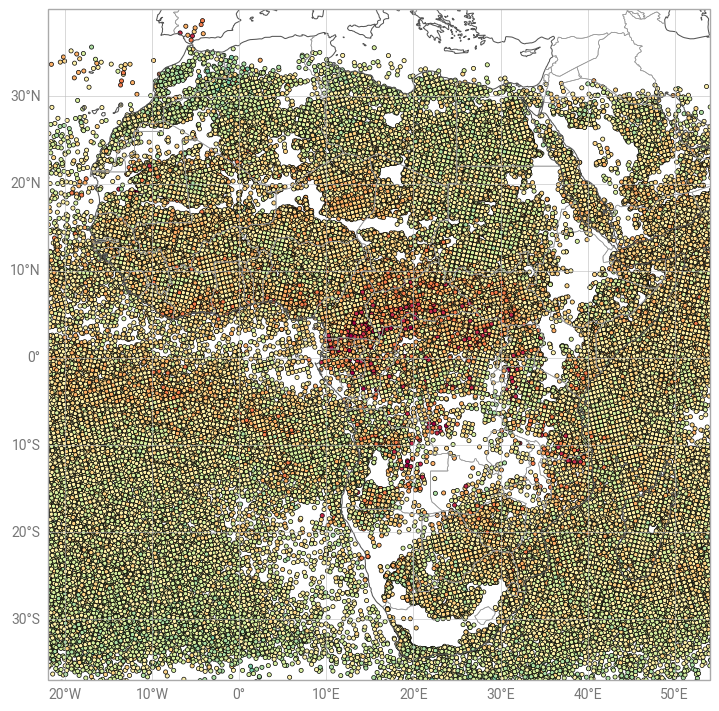

In [4]:
chart = earthkit.plots.Map(domain="Africa")

chart.scatter(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=SCATTER_STYLE
)

chart.coastlines()
chart.borders()
chart.gridlines()

# # TODO: fix legend method for 1D data
# chart.legend()

chart.show()

/Users/edwardcomyn-platt/Work/Git_Repositories/EARTHKIT/earthkit-plots/src/earthkit/plots/geo/grids.py:103: UserWarning: Using earthkit.geo to determine if grid is global is not implemented.
  warnings.warn("Using earthkit.geo to determine if grid is global is not implemented.")
/Users/edwardcomyn-platt/Work/Git_Repositories/EARTHKIT/earthkit-plots/src/earthkit/plots/geo/grids.py:103: UserWarning: Using earthkit.geo to determine if grid is global is not implemented.
  warnings.warn("Using earthkit.geo to determine if grid is global is not implemented.")
/opt/homebrew/Caskroom/miniforge/base/envs/EK-DEVELOP/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'edgecolors', 'marker'
  result = super().contourf(*args, **kwargs)


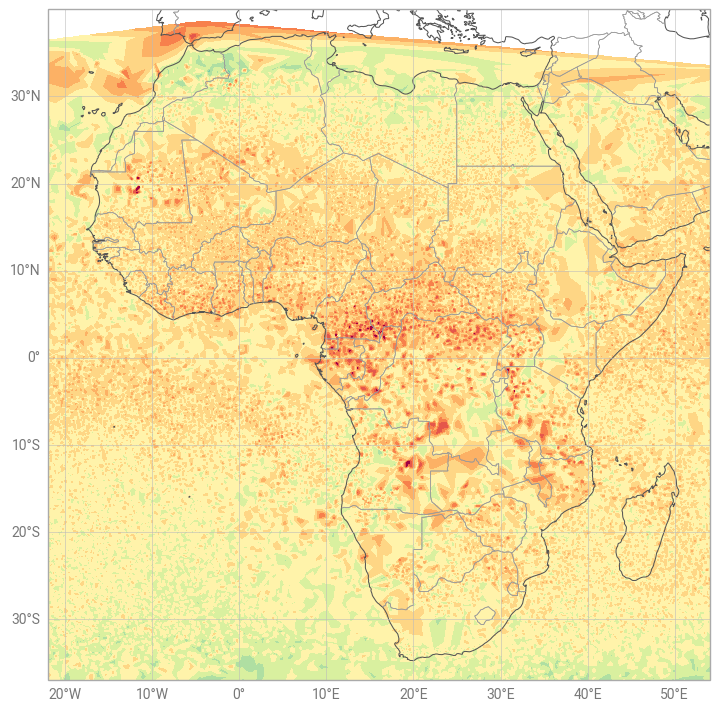

In [5]:
chart = earthkit.plots.Map(domain="Africa")

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=SCATTER_STYLE
)

chart.coastlines()
chart.borders()
chart.gridlines()

# # TODO: fix legend method for 1D data
# chart.legend()

chart.show()

/Users/edwardcomyn-platt/Work/Git_Repositories/EARTHKIT/earthkit-plots/src/earthkit/plots/geo/grids.py:103: UserWarning: Using earthkit.geo to determine if grid is global is not implemented.
  warnings.warn("Using earthkit.geo to determine if grid is global is not implemented.")
/Users/edwardcomyn-platt/Work/Git_Repositories/EARTHKIT/earthkit-plots/src/earthkit/plots/geo/grids.py:103: UserWarning: Using earthkit.geo to determine if grid is global is not implemented.
  warnings.warn("Using earthkit.geo to determine if grid is global is not implemented.")
/opt/homebrew/Caskroom/miniforge/base/envs/EK-DEVELOP/lib/python3.13/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'edgecolors', 'marker'
  result = super().contourf(*args, **kwargs)


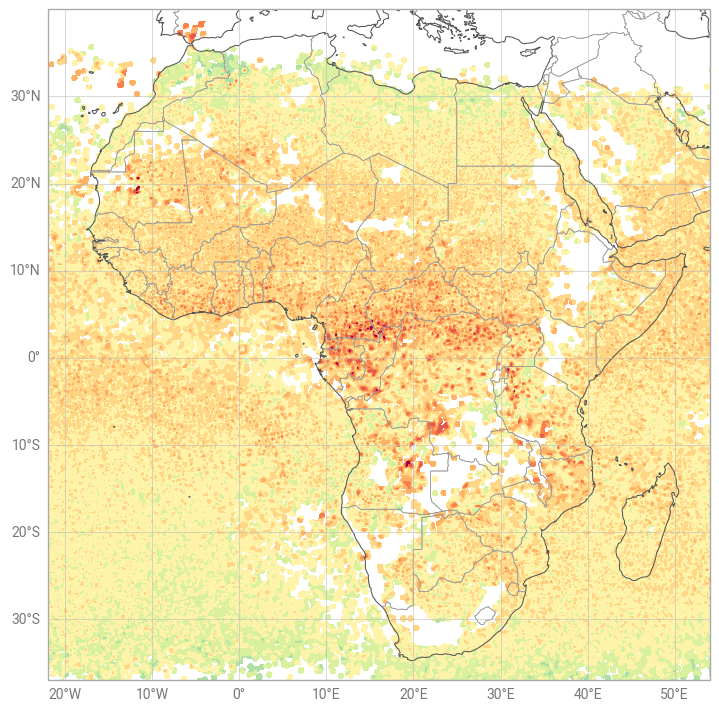

In [6]:
chart = earthkit.plots.Map(domain="Africa")

chart.contourf(
    z = data_xr.co2.values,
    x = data_xr.longitude.values,
    y = data_xr.latitude.values,
    style=SCATTER_STYLE,
    interpolation_distance_threshold="auto"
)

chart.coastlines()
chart.borders()
chart.gridlines()

# # TODO: fix legend method for 1D data
# chart.legend()

chart.show()